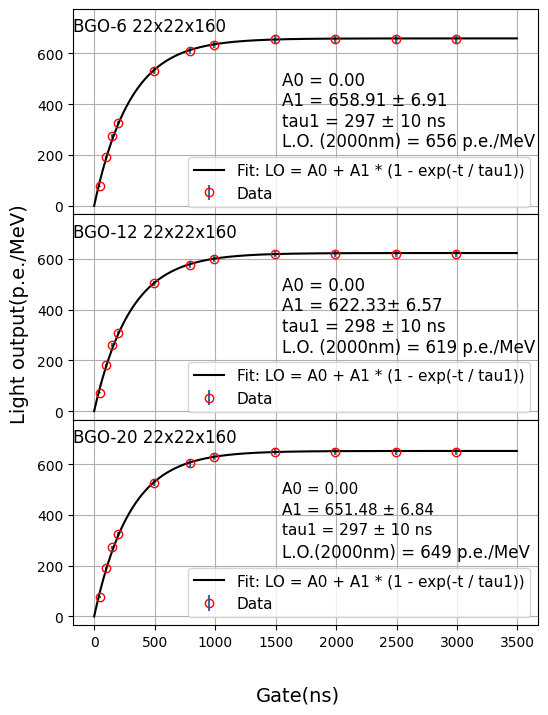

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given Data
gate = np.array([50, 100, 150, 200, 500, 800, 1000, 1500, 2000, 2500, 3000]) - 5  # Time in ns
pedestal = np.array([25, 44, 52, 60, 127, 177, 207, 284, 358, 432, 505])
Calibration = np.array([0.579, 0.637, 0.678, 0.734, 0.93, 1.011, 1.041 ,1.086, 1.107, 1.11, 1.113])

# Three different fitted_peak datasets
# fitted_peak_1 = np.array([47.2, 106.8, 150, 185.8, 387.3, 501, 555.3, 659, 742.1, 817.5, 892.1])
# fitted_peak_7 = np.array([50.1, 109.3, 151.3, 186.9, 386.7, 500.17, 553.6, 656.8, 739, 814.9, 888.5])
# fitted_peak_14 = np.array([47.9, 107.8, 150.9, 187.4, 390.2, 505.8, 559.6, 663.7, 746.2, 821.6, 895.7])
fitted_peak_6 = np.array([47.9, 106.1, 147.4, 182.7, 380, 492.1, 544.1, 647.8, 729, 804.27, 878.4]) 
fitted_peak_12 = np.array([46.4, 102.5, 142.2, 175.6, 365.9, 474.5, 526.1, 627.4, 708, 783.4, 857.4])
fitted_peak_20 = np.array([47.6, 105.7, 146.52, 181.5, 377.3, 488.7, 541.2, 643.5, 725.1, 799.7, 873.7])

# Compute Light Output (LO) for all three datasets and errors
# LO_1 = (fitted_peak_1 - pedestal)/ (Calibration * 0.511) # Light output in p.e./MeV
# LO_7 = (fitted_peak_7 - pedestal) / (Calibration * 0.511)
# LO_14 = (fitted_peak_14 - pedestal) / (Calibration * 0.511)
# sigma_LO_1 = LO_1*0.02 + 1
# sigma_LO_7 = LO_7*0.02 + 1
# sigma_LO_14 = LO_14*0.02 + 1

LO_6 = (fitted_peak_6 - pedestal)/ (Calibration * 0.511) # Light output in p.e./MeV
LO_12 = (fitted_peak_12 - pedestal) / (Calibration * 0.511)
LO_20 = (fitted_peak_20 - pedestal) / (Calibration * 0.511)
sigma_LO_6 = LO_6*0.02 + 1
sigma_LO_12 = LO_12*0.02 + 1
sigma_LO_20 = LO_20*0.02 + 1
# Define the function for fitting
def fit_function(t, A0, A1, tau1):
    return A0 + A1 * (1 - np.exp(-t / tau1))

# # Fit the function to the data for each dataset
# popt_1, _ = curve_fit(fit_function, gate, LO_1, p0=[0, 200, 500])
# popt_7, _ = curve_fit(fit_function, gate, LO_7, p0=[0, 200, 500])
# popt_14, _ = curve_fit(fit_function, gate, LO_14, p0=[0, 200, 500])

# Fit the function to the data with A0 constrained to be >= 0
# popt_1, pcov_1 = curve_fit(fit_function, gate, LO_1, p0=[0, 200, 500], bounds=([0, 200, 250], [np.inf, np.inf, 500]), sigma=sigma_LO_1, absolute_sigma=True, maxfev= 10000)
# popt_7, pcov_7 = curve_fit(fit_function, gate, LO_7, p0=[0, 200, 500], bounds=([0, 200, 250], [np.inf, np.inf, 500]), sigma=sigma_LO_7, absolute_sigma=True, maxfev= 10000)
# popt_14, pcov_14 = curve_fit(fit_function, gate, LO_14, p0=[0, 200, 500], bounds=([0, 200, 250], [np.inf, np.inf, 500]), sigma=sigma_LO_14, absolute_sigma=True, maxfev= 10000)
popt_6, pcov_6 = curve_fit(fit_function, gate, LO_6, p0=[0, 200, 500], bounds=([0, 200, 250], [np.inf, np.inf, 500]), sigma=sigma_LO_6, absolute_sigma=True, maxfev= 10000)
popt_12, pcov_12 = curve_fit(fit_function, gate, LO_12, p0=[0, 200, 500], bounds=([0, 200, 250], [np.inf, np.inf, 500]), sigma=sigma_LO_12, absolute_sigma=True, maxfev= 10000)
popt_20, pcov_20 = curve_fit(fit_function, gate, LO_20, p0=[0, 200, 500], bounds=([0, 200, 250], [np.inf, np.inf, 500]), sigma=sigma_LO_20, absolute_sigma=True, maxfev= 10000)

# Generate fitted curves
gate_fine = np.linspace(0, max(gate)+500,3501)
# LO_fitted_1 = fit_function(gate_fine, *popt_1)
# LO_fitted_7 = fit_function(gate_fine, *popt_7)
# LO_fitted_14 = fit_function(gate_fine, *popt_14)
LO_fitted_6 = fit_function(gate_fine, *popt_6)
LO_fitted_12 = fit_function(gate_fine, *popt_12)
LO_fitted_20 = fit_function(gate_fine, *popt_20)


# Create a 3x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(6, 8), sharex=True, sharey=True)

# Plot data and fits for fitted_peak_1
# axs[0].errorbar(gate, LO_1, yerr= sigma_LO_1, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
# axs[0].plot(gate_fine, LO_fitted_1, color='black', label=f'Fit: LO = A0 + A1 * (1 - exp(-t / tau1))')
# axs[0].set_title('BGO-1 22x22x160', loc='left', x=0.0, y=0.85)  # Top-left title 
# axs[0].legend(fontsize = 11)
# axs[0].grid(True)
axs[0].errorbar(gate, LO_6, yerr= sigma_LO_6, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
axs[0].plot(gate_fine, LO_fitted_6, color='black', label=f'Fit: LO = A0 + A1 * (1 - exp(-t / tau1))')
axs[0].set_title('BGO-6 22x22x160', loc='left', x=0.0, y=0.85)  # Top-left title
axs[0].legend(fontsize = 11)
axs[0].grid(True)

# Add fit equation in algebraic form and parameter values separately
equation_6 = 'LO = A0 + A1 * (1 - exp(-t / tau1))'
#axs[0].text(0.05, 0.9, equation_1, transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
# axs[0].text(0.45, 0.7, f'A0 = {popt_1[0]:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
# axs[0].text(0.45, 0.6, f'A1 = {popt_1[1]:.2f} ± {np.sqrt(np.diag(pcov_1))[1]:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
# axs[0].text(0.45, 0.5, f'tau1 = {popt_1[2]:.0f} ± {np.sqrt(np.diag(pcov_1))[2]:.0f} ns', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
# axs[0].text(0.45, 0.4, f'L.O. (2000nm) = {LO_1[8]:.0f} p.e./MeV', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[0].text(0.45, 0.7, f'A0 = {popt_6[0]:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[0].text(0.45, 0.6, f'A1 = {popt_6[1]:.2f} ± {np.sqrt(np.diag(pcov_6))[1]:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[0].text(0.45, 0.5, f'tau1 = {popt_6[2]:.0f} ± {np.sqrt(np.diag(pcov_6))[2]:.0f} ns', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[0].text(0.45, 0.4, f'L.O. (2000nm) = {LO_6[8]:.0f} p.e./MeV', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')

# Plot data and fits for fitted_peak_7
# axs[1].errorbar(gate, LO_7, yerr= sigma_LO_7, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
# axs[1].plot(gate_fine, LO_fitted_7, color='black', label=f'Fit: LO = A0 + A1 * (1 - exp(-t / tau1))')
# axs[1].set_title('BGO-7 22x22x160', loc='left', x=0.0, y=0.85)  # Top-left title
# axs[1].legend(fontsize = 11)
# axs[1].grid(True)
axs[1].errorbar(gate, LO_12, yerr= sigma_LO_12, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
axs[1].plot(gate_fine, LO_fitted_12, color='black', label=f'Fit: LO = A0 + A1 * (1 - exp(-t / tau1))')
axs[1].set_title('BGO-12 22x22x160', loc='left', x=0.0, y=0.85)  # Top-left title
axs[1].legend(fontsize = 11)
axs[1].grid(True)

# Add fit equation in algebraic form and parameter values separately
equation_12 = 'LO = A0 + A1 * (1 - exp(-t / tau1))'
#axs[1].text(0.05, 0.9, equation_7, transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
# axs[1].text(0.45, 0.7, f'A0 = {popt_7[0]:.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
# axs[1].text(0.45, 0.6, f'A1 = {popt_7[1]:.2f}± {np.sqrt(np.diag(pcov_7))[1]:.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
# axs[1].text(0.45, 0.5, f'tau1 = {popt_7[2]:.0f} ± {np.sqrt(np.diag(pcov_7))[2]:.0f} ns', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
# axs[1].text(0.45, 0.4, f'L.O. (2000nm) = {LO_7[8]:.0f} p.e./MeV', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.45, 0.7, f'A0 = {popt_12[0]:.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.45, 0.6, f'A1 = {popt_12[1]:.2f}± {np.sqrt(np.diag(pcov_12))[1]:.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.45, 0.5, f'tau1 = {popt_12[2]:.0f} ± {np.sqrt(np.diag(pcov_12))[2]:.0f} ns', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.45, 0.4, f'L.O. (2000nm) = {LO_12[8]:.0f} p.e./MeV', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')

# Plot data and fits for fitted_peak_14
# axs[2].errorbar(gate, LO_14, yerr= sigma_LO_14, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
# axs[2].plot(gate_fine, LO_fitted_14, color='black', label=f'Fit: LO = A0 + A1 * (1 - exp(-t / tau1))')
# axs[2].set_title('BGO-14 22x22x160', loc='left', x=0.0, y=0.85)  # Top-left title
# #axs[2].set_xlabel("Gate (ns)")
# axs[2].legend(fontsize = 11)
# axs[2].grid(True)
# # Add fit equation in algebraic form and parameter values separately
# equation_14 = 'LO = A0 + A1 * (1 - exp(-t / tau1))'
# #axs[2].text(0.05, 0.9, equation_14, transform=axs[2].transAxes, fontsize=12, verticalalignment='top')
# axs[2].text(0.45, 0.7, f'A0 = {popt_14[0]:.2f} ', transform=axs[2].transAxes, fontsize=11, verticalalignment='top')
# axs[2].text(0.45, 0.6, f'A1 = {popt_14[1]:.2f} ± {np.sqrt(np.diag(pcov_14))[1]:.2f}', transform=axs[2].transAxes, fontsize=11, verticalalignment='top')
# axs[2].text(0.45, 0.5, f'tau1 = {popt_14[2]:.0f} ± {np.sqrt(np.diag(pcov_14))[2]:.0f} ns', transform=axs[2].transAxes, fontsize=11, verticalalignment='top')
# axs[2].text(0.45, 0.4, f'L.O.(2000nm) = {LO_14[8]:.0f} p.e./MeV', transform=axs[2].transAxes, fontsize=12, verticalalignment='top')

axs[2].errorbar(gate, LO_20, yerr= sigma_LO_20, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
axs[2].plot(gate_fine, LO_fitted_20, color='black', label=f'Fit: LO = A0 + A1 * (1 - exp(-t / tau1))')
axs[2].set_title('BGO-20 22x22x160', loc='left', x=0.0, y=0.85)  # Top-left title
#axs[2].set_xlabel("Gate (ns)")
axs[2].legend(fontsize = 11)
axs[2].grid(True)
# Add fit equation in algebraic form and parameter values separately
equation_20 = 'LO = A0 + A1 * (1 - exp(-t / tau1))'
#axs[2].text(0.05, 0.9, equation_14, transform=axs[2].transAxes, fontsize=12, verticalalignment='top')
axs[2].text(0.45, 0.7, f'A0 = {popt_20[0]:.2f} ', transform=axs[2].transAxes, fontsize=11, verticalalignment='top')
axs[2].text(0.45, 0.6, f'A1 = {popt_20[1]:.2f} ± {np.sqrt(np.diag(pcov_20))[1]:.2f}', transform=axs[2].transAxes, fontsize=11, verticalalignment='top')
axs[2].text(0.45, 0.5, f'tau1 = {popt_20[2]:.0f} ± {np.sqrt(np.diag(pcov_20))[2]:.0f} ns', transform=axs[2].transAxes, fontsize=11, verticalalignment='top')
axs[2].text(0.45, 0.4, f'L.O.(2000nm) = {LO_20[8]:.0f} p.e./MeV', transform=axs[2].transAxes, fontsize=12, verticalalignment='top')
# Set common title for all subplots
#fig.suptitle('Time Decay', fontsize=16)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0)  # Set distance between subplots to zero

# Add extra space on top of the plots
ymin, ymax = axs[2].get_ylim()  # Get y-limits from the last subplot
axs[2].set_ylim(ymin, ymax * 1.1)  # Increase the upper y-limit by 10%
fig.supylabel("Light output(p.e./MeV)", fontsize = 14)
fig.supxlabel("Gate(ns)", fontsize = 14)
#fig.suptitle("BGO 1: 22x22x160 mm$^3$", fontsize=12, y = 0.9 )
# Show the plot
plt.show()



In [5]:
print(sigma_LO_6)

[ 2.54798238  4.81558615  6.50716104  7.54270891 11.64747596 13.19849754
 13.67409968 14.11118559 14.11702615 14.12635532 14.13071106]
